# **Ventas data mining**

In [ ]:
print('''Se trata de un conjunto de datos transaccionales que contiene
todas las transacciones ocurridas entre el 01/12/2010y el
09/12/2011 para un comercio minorista en línea sintienda
física registrado y con sede en el Reino Unido.''')
print('_'*78)
print('''información adicional:Se trata de un conjunto de datos transaccionales que
contiene todas las transacciones que se produjeron entre el 1 de diciembre
de 2010 y el 9 de diciembre de 2011 para una empresa minorista en línea sin
establecimientos físicos registrada y con sede en el Reino Unido.La empresa
vende principalmente regalos exclusivos para cualquier ocasión.''')

Se trata de un conjunto de datos transaccionales que contiene
todas las transacciones ocurridas entre el 01/12/2010y el
09/12/2011 para un comercio minorista en línea sintienda
física registrado y con sede en el Reino Unido.
______________________________________________________________________________
información adicional:Se trata de un conjunto de datos transaccionales que
contiene todas las transacciones que se produjeron entre el 1 de diciembre
de 2010 y el 9 de diciembre de 2011 para una empresa minorista en línea sin
establecimientos físicos registrada y con sede en el Reino Unido.La empresa
vende principalmente regalos exclusivos para cualquier ocasión.


# **Importación de librerias y carga de datos**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Cargar los datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
data = pd.read_excel(url)
# Ver las primeras filas del DataFrame
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


# **Limpieza de los datos**

In [ ]:
# Eliminar filas con valores nulos en columnas críticas
data.dropna(subset=['InvoiceNo', 'Description', 'Quantity', 'UnitPrice'], inplace=True)
# Filtrar solo las transacciones positivas (ventas)
data = data[data['Quantity'] > 0]
# Convertir la columna 'InvoiceDate' a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
# Verificar los cambios
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 530693 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530693 non-null  object        
 1   StockCode    530693 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     530693 non-null  int64         
 4   InvoiceDate  530693 non-null  datetime64[ns]
 5   UnitPrice    530693 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      530693 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB
None


# **Preprocesamiento**

1.   Identificar los productos más vendidos
2.   Analizar las tendencias de ventas a lo largo del tiempo
3.   Evaluar el rendimiento por categoría de producto
4.   Identificar patrones de compra por cliente
5.  Conclusiones

# **1.Identificar los productos más vendidos**

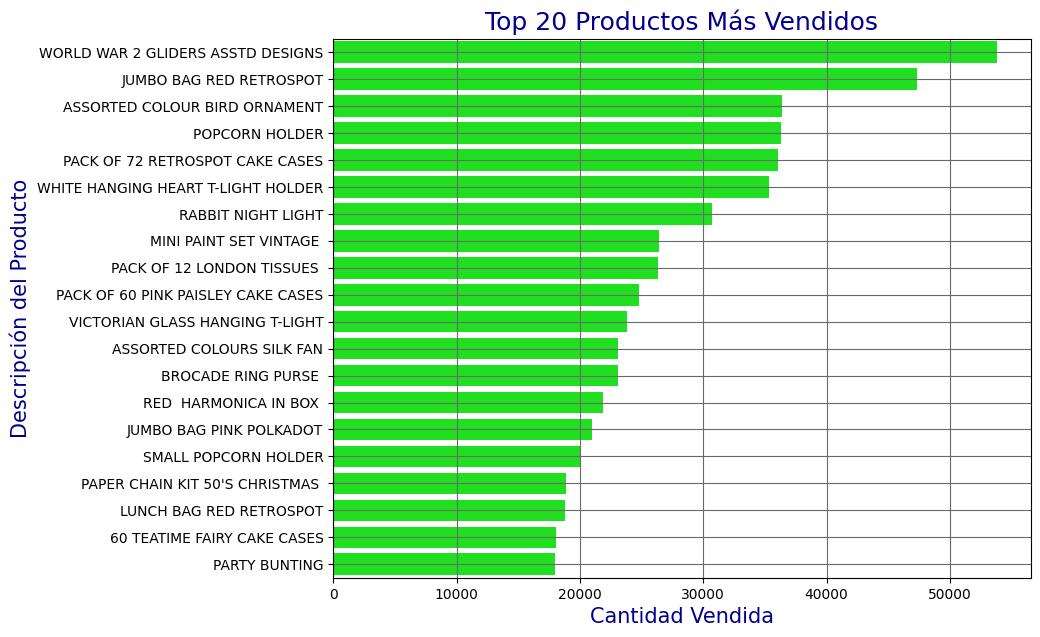

In [ ]:
# Agrupar por 'Description' y sumar las 'Quantity'
products_sold = data.groupby('Description')['Quantity'].sum().reset_index()

# Ordenar los productos por cantidad vendida
top_products = products_sold.sort_values(by='Quantity', ascending=False).head(20)

# Visualizar los productos más vendidos
plt.figure(figsize=(9, 7))
sns.barplot(x='Quantity', y='Description', data=top_products, color= 'lime')
plt.title('Top 20 Productos Más Vendidos', color= 'darkblue', fontsize=18)
plt.xlabel('Cantidad Vendida',color= 'darkblue', fontsize=15)
plt.ylabel('Descripción del Producto', color= 'darkblue', fontsize=15)
plt.grid(color= 'dimgray')
plt.show()

#**2. Analisis de la tendencia de ventas a lo largo del tiempo**

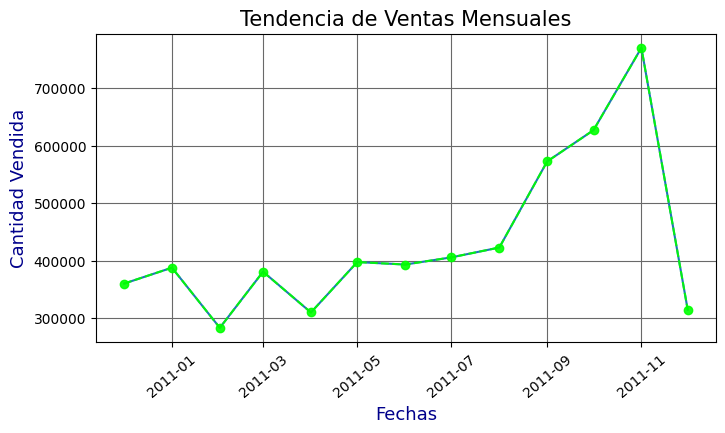

In [ ]:
# Crear una columna para el año y mes
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

# Agrupar por mes y sumar las cantidades vendidas
monthly_sales = data.groupby('YearMonth')['Quantity'].sum().reset_index()

# Convertir YearMonth a datetime para la visualización
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

# Visualizar la tendencia de ventas mensuales
plt.xticks(rotation=40)
sns.lineplot(x='YearMonth', y='Quantity', data=monthly_sales)
plt.rcParams['figure.figsize'] = [8, 4]
plt.plot(monthly_sales['YearMonth'], monthly_sales['Quantity'], linestyle='--', marker='o', color= 'lime', alpha=0.9, label='YearMonth')
plt.title('Tendencia de Ventas Mensuales', color= 'black', fontsize=15)
plt.xlabel('Fechas', color= 'darkblue', fontsize=13)
plt.ylabel('Cantidad Vendida', color= 'darkblue', fontsize=13)
plt.grid(color= 'dimgray')
plt.show()

# 3.

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
